In [1]:
import os 
import sys
sys.path.append(os.path.join(".."))
from utils.imutils import jimshow, jimshow_channel
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = Path.cwd().parent / "data" / "img" / "trex.png"

In [3]:
image = cv2.imread(str(fname))

In [4]:
cv2.rectangle(image, pt1=(50,200), pt2=(200,225), color=(255,0,0), thickness=3)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

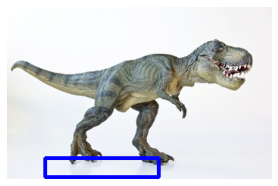

In [5]:
jimshow(image)

__Draw Circle__

In [6]:
image = cv2.imread(str(fname))

In [7]:
(centerX, centerY) = image.shape[1] // 2, image.shape[0] // 2

In [8]:
cv2.circle(image, (centerX, centerY), 50, (0,255,0), 1)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

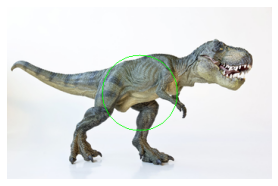

In [9]:
jimshow(image)

cv2.circle(image, center=(200,20), radius=30, color=(140,255,60), thickness=3)

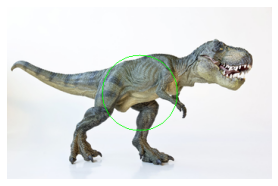

In [10]:
jimshow(image)

## Creating and using masks

In [11]:
image = cv2.imread(str(fname))

In [12]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [13]:
cv2.rectangle(mask, (100,100), (200,200), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

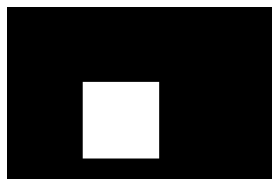

In [14]:
jimshow_channel(mask)

In [15]:
masked = cv2.bitwise_and(image, image, mask=mask)

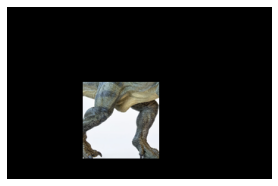

In [16]:
jimshow(masked)

## Circle mask

In [17]:
image = cv2.imread(str(fname))

In [18]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [19]:
cv2.circle(mask, (100,100), radius=30, color=(140,255,60), thickness=-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

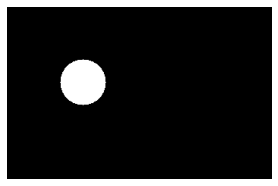

In [20]:
jimshow_channel(mask)

In [21]:
masked = cv2.bitwise_and(image, image, mask=mask)

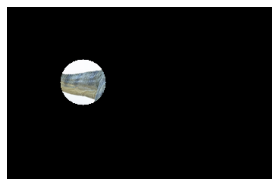

In [22]:
jimshow(masked)

## Blurring

__Average blur__

In [23]:
image = cv2.imread(str(fname))

In [24]:
blurred = cv2.blur(src=image, ksize=(3,3))

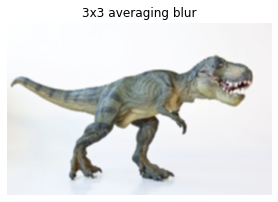

In [25]:
jimshow(blurred, "3x3 averaging blur")

In [26]:
stacked = np.hstack([
    cv2.blur(src=image, ksize=(3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7)),
])

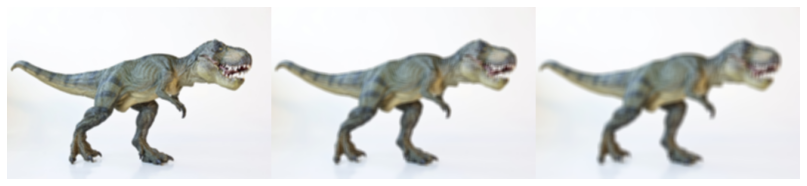

In [27]:
jimshow(stacked)

## Thresholding

In [28]:
image = cv2.imread(str(fname))

In [29]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

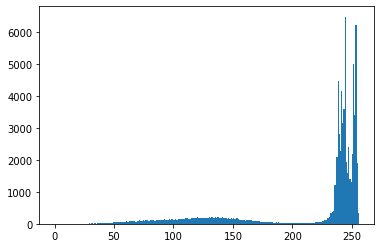

In [30]:
plt.hist(grey_image.flatten(), 256, [0,256])
plt.show()

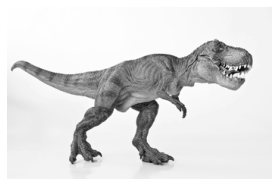

In [31]:
jimshow_channel(grey_image)

In [32]:
blurred = cv2.blur(src=grey_image, ksize=(5,5))

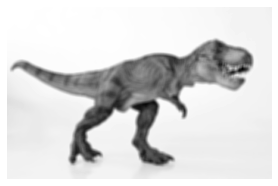

In [33]:
jimshow_channel(blurred)

In [40]:
(T_value, threshold) = cv2.threshold(src=blurred, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

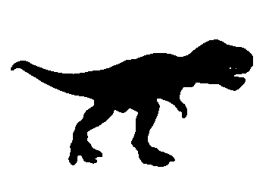

In [41]:
jimshow_channel(threshold)

In [44]:
(T_value, threshold_inverted) = cv2.threshold(src=blurred, thresh=200, maxval=255, type=cv2.THRESH_BINARY_INV)

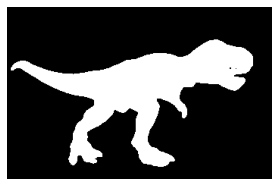

In [43]:
jimshow_channel(threshold_inverted)

In [45]:
masked = cv2.bitwise_and(image, image, mask=threshold_inverted)

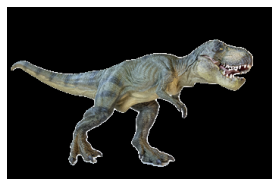

In [46]:
jimshow(masked)